# Optimization Process

### Load cases, run once at each load case

It is suggested to run once with a specific load case you want to design and then just re run multiple times the cell below this one (the one where you change the thicknesses)

In [1]:
from variables import *
from wp4_2 import WingBox

"""
xflr_files = 'XFLRdata\\XFLR5sims'

# change these
aircraft_mass = 35688
alt_sound_speed = 296.56

internal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, 
                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, 
                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)
    
    
shear_list, moment_list, torque_list, axial_list, g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, 
                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)

internal_forces.show(engine_mass=engine_mass, wing_box_length=wing_box_length, fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)"""

"\nxflr_files = 'XFLRdata\\XFLR5sims'\n\n# change these\naircraft_mass = 35688\nalt_sound_speed = 296.56\n\ninternal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, \n                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, \n                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)\n    \n    \nshear_list, moment_list, torque_list, axial_list, g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, \n                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)\n\ninternal_forces.show(engine_mass=engine_mass, wing_box_length=wing_box_length, fuel_tank_length=fuel_tank_le

In [2]:
# Functions for the critical load cases are being saved here!!!!!!!
import pickle
"""
# Save all lists in a dictionary
all_lists = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list}

# Write to a file
with open("lists.pkl", "wb") as f:
    pickle.dump(all_lists, f)
    
"""

'\n# Save all lists in a dictionary\nall_lists = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list}\n\n# Write to a file\nwith open("lists.pkl", "wb") as f:\n    pickle.dump(all_lists, f)\n    \n'

In [3]:
from scipy.interpolate import interp1d
import numpy as np

# Functions for the critical load cases are being called here!!!!!!!
with open("lists.pkl", "rb") as f:
    loaded_lists = pickle.load(f)

z_points = np.linspace(0, 26.9 / 2, 1000)

# Access the lists
g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")

Now defining the wingbox, you can finally change the thicknesses here!

# Plotting

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
design1 = pd.read_csv('deflections/option8-1.csv')
design2 = pd.read_csv('deflections/option5-1.csv')

design3 = pd.read_csv('deflections/option9-1.csv')

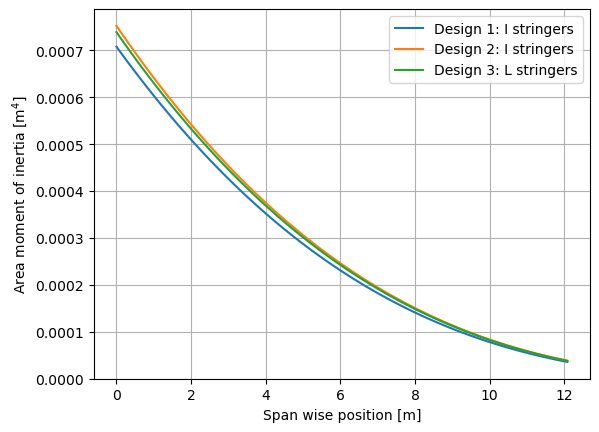

In [6]:
plt.plot(design1['z location [m]'], design1['Area Moment of Inertia [mm^4]'], label='Design 1: I stringers')
plt.plot(design2['z location [m]'], design2['Area Moment of Inertia [mm^4]'], label='Design 2: I stringers')
plt.plot(design3['z location [m]'], design3['Area Moment of Inertia [mm^4]'], label='Design 3: L stringers')
plt.xlabel('Span wise position [m]')
plt.ylabel(r'Area moment of inertia [m$^4$]')
plt.grid()
plt.legend()
#plt.tight_layout()
plt.savefig('Areamomentofinertia.svg')
plt.show()

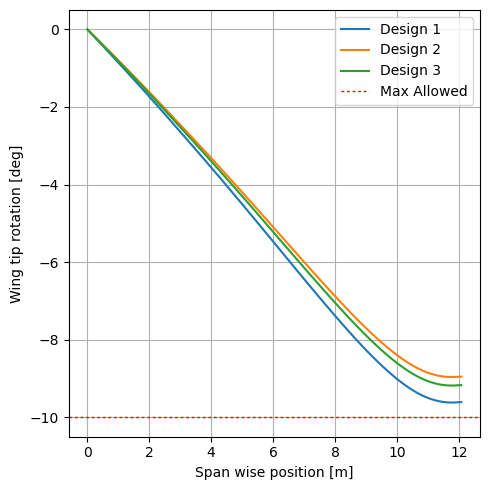

In [7]:
import matplotlib.pyplot as plt
import numpy as np
wingspan_og = 26.9

plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Rotation [deg]'], label= 'Design 1')
plt.plot(design2['z location [m]'], design2['Rotation [deg]'], label= 'Design 2')
plt.plot(design3['z location [m]'], design3['Rotation [deg]'], label= 'Design 3')
plt.axhline(y = np.sign(design1['Rotation [deg]'].iloc[-1])*10, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')
plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip rotation [deg]")
plt.ylim(-10.5, 0.5)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1rotation.svg')
plt.show()


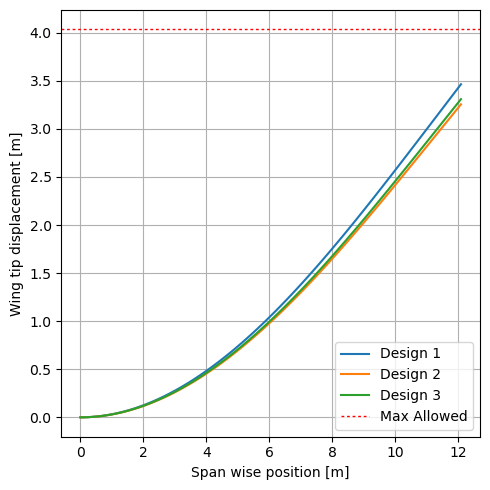

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Displacement [m]'], label='Design 1')
plt.plot(design2['z location [m]'], design2['Displacement [m]'], label='Design 2')
plt.plot(design3['z location [m]'], design3['Displacement [m]'], label='Design 3')

plt.axhline(y = np.sign(design1['Displacement [m]'].iloc[-1])*0.15*wingspan_og, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')

plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip displacement [m]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1displacement.svg')
plt.show()

# Work Package 5

### Finally working on wp5, no need to run the previous cells, start running from here yay!

In [9]:
from scipy.interpolate import interp1d
import numpy as np
import pickle

# Functions for the critical load cases are being called here!!!!!!!
with open("lists.pkl", "rb") as f:
    loaded_lists = pickle.load(f)

z_points = np.linspace(0, 26.9 / 2, 1000)

# Access the lists
g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")

In [10]:
from wp4_2 import WingBox
from variables import *

t_caps = 0.004
t_spar = 0.008
area_factor = 12
wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=area_factor, 
                  intersection= intersection, tr= tr, t_spar= t_spar, t_caps= t_spar)

dimensions = {'base': 40e-3, 'height': 40e-3, 'thickness base': 4e-3, 'thickness height': 4e-3}
stringers = [20, 1, 'L', dimensions]
 
wingbox.show(wingbox.z, loads= [g_moment, g_torque], moduli= [E, G], stringers= stringers, limits=[0, 10], plot= False, degrees= True, 
             save=False, filename=None)
# if you wanna save the plot just set save=True and put some filename.png i.e. filename= 'thickness2.png'
area_stringer = dimensions['base']*dimensions['thickness base'] + dimensions['height']*dimensions['thickness height']

print(f'The steinerarea now is: {area_stringer} m2')

Wing span modified goes from 0 to 12.08
Max Tip Displacement OK Displacement = 2.241517985531387 8.332780615358317 (% Wingspan)
Wing Tip Max. Rotation Allowed Max displacement = 3.9868935720684218
The steinerarea now is: 0.00032 m2


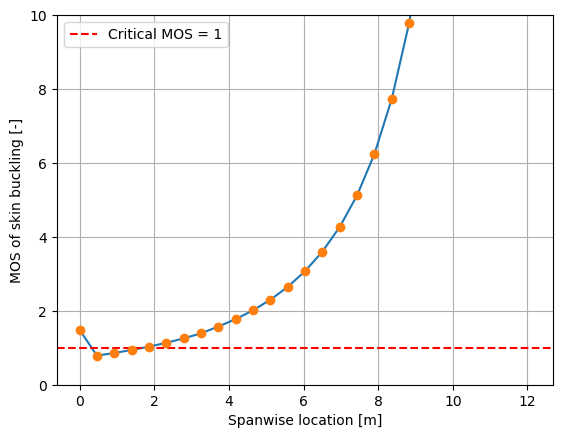

(array([0.11653275, 0.11344624, 0.11040237, 0.1073744 , 0.10435669,
        0.1013466 , 0.09834257, 0.09534356, 0.09234885, 0.08935789,
        0.08637026, 0.08338562, 0.0804037 , 0.07742426, 0.07444711,
        0.07147209, 0.06849906, 0.06552789, 0.06255846, 0.05959069,
        0.05662447, 0.05365974, 0.05069642, 0.04773445, 0.04477377,
        0.04181432, 0.03885605]),
 array([14.9683142 ,  7.32345361,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549,  7.30425549,  7.30425549,  7.30425549,
         7.30425549,  7.30425549]))

<Figure size 640x480 with 0 Axes>

In [11]:
from wp5_1 import SkinBuckling, Area_crosssection
n_ribs = 27

skin = SkinBuckling(n_ribs=n_ribs, E= E, wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, v= 0.33, M = g_moment, N= g_axial, 
                    I_tot = wingbox.MOM_total, t_caps=t_caps, stringers= stringers, area=Area_crosssection, chord= wingbox.chord, 
                    flange = area_factor, t_spar = t_spar)
# if you want a ceiling in the graph so to see you actually surpass the 1 mos mark insert ceiling = True, 
# power value is used to concentrate the ribs more at the root
skin.show(ceiling = True, concentration=0)
skin.skin_Ks(concentration= 0.01)

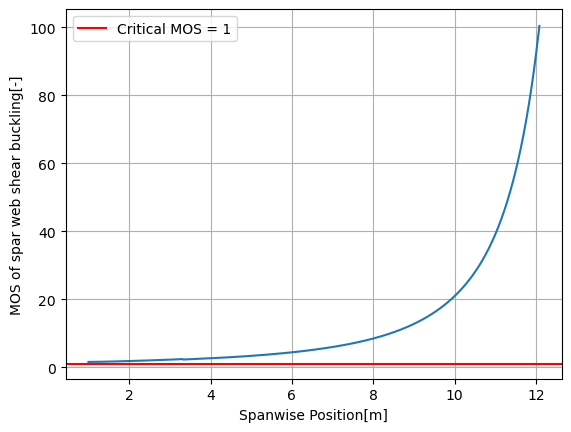

In [12]:
from wp5_1 import SparWebBuckling, Area_crosssection
t_front = 7e-3
t_rear = 8e-3
spar = SparWebBuckling(wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, E= E, pois = 0.33, t_front= t_front, t_rear=t_rear, 
                       k_v= 1.5)
spar.margin_of_safety(z=1, V= g_shear, T=g_torque)

spar.show_mos(V= g_shear, T= g_torque, choice = 'front')

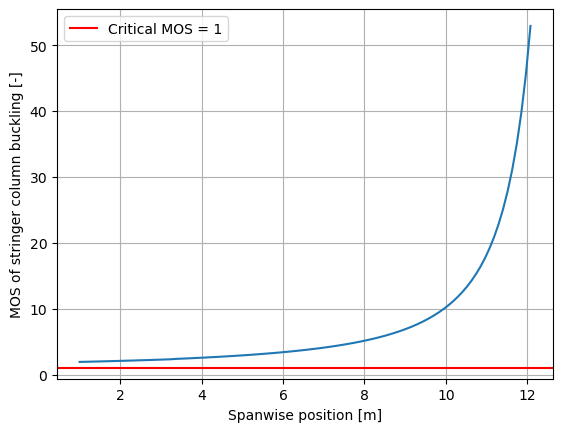

Applied Stress Array: [4.93086873e+08 4.89066946e+08 4.85031840e+08 4.80982051e+08
 4.76918042e+08 4.72840246e+08 4.68749086e+08 4.64644983e+08
 4.60528372e+08 4.56399705e+08 4.52259460e+08 4.48108139e+08
 4.43946268e+08 4.39774393e+08 4.35593074e+08 4.31402881e+08
 4.27204386e+08 4.22998164e+08 4.18784788e+08 4.14564830e+08
 4.10338195e+08 4.01290040e+08 3.96444838e+08 3.91620055e+08
 3.86775661e+08 3.81911802e+08 3.77028639e+08 3.72126350e+08
 3.67205136e+08 3.62265223e+08 3.57306858e+08 3.52330313e+08
 3.47335878e+08 3.42323860e+08 3.37294580e+08 3.32248366e+08
 3.27185552e+08 3.22106475e+08 3.17011469e+08 3.11900869e+08
 3.06775011e+08 3.01634228e+08 2.96478864e+08 2.91309268e+08
 2.86125808e+08 2.80928875e+08 2.75718887e+08 2.70496301e+08
 2.65261619e+08 2.60015391e+08 2.54758222e+08 2.49490774e+08
 2.44213770e+08 2.38927993e+08 2.33634286e+08 2.28333546e+08
 2.23026724e+08 2.17714822e+08 2.12398887e+08 2.07080006e+08
 2.01759311e+08 1.96437971e+08 1.91117199e+08 1.85798257e+08
 1

In [13]:
from wp5_1 import Stringer_bucklin

stringer = Stringer_bucklin(stringers=stringers, wingspan= wingbox.wingspan, M=g_moment, N=g_axial, I_tot=wingbox.MOM_total, area=Area_crosssection, flange=area_factor,
                            t_caps=t_caps, t_spar= t_spar, chord= wingbox.chord, geometry= wingbox.geometry,n_ribs=n_ribs )

stringer.graph_buckling_values(E=E)
stringer.MOS_buckling_values(E=E, stringers=stringers)

Wing span modified goes from 0 to 12.08
0.0013040506307633714


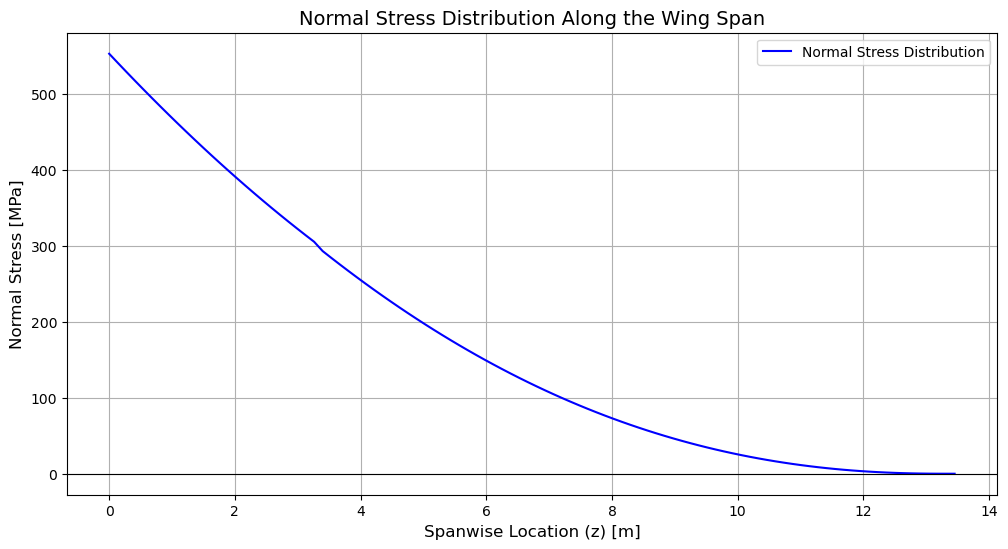

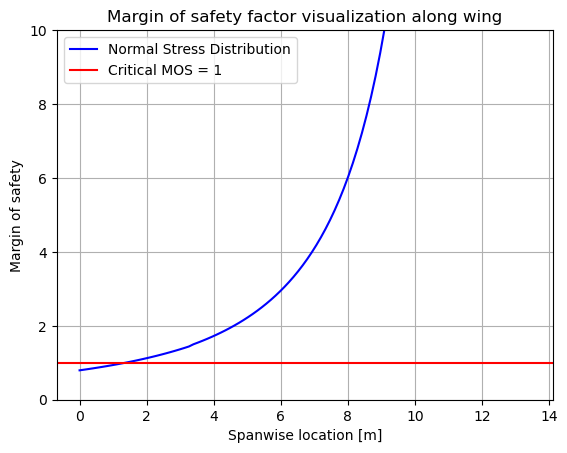

In [14]:
from wp5_1 import Area_crosssection
from wp4_2 import WingBox
from variables import *
import matplotlib.pyplot as plt

t_caps = 0.008
t_spar = 0.008

area_factor = 12

wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=area_factor, intersection= intersection, tr= tr, t_spar= t_spar, t_caps= t_caps)

stringers = [24, 1, 'L', {'base': 30e-3, 'height': 30e-3, 'thickness base': 2e-3, 'thickness height': 2e-3}]

def x_func(z):
    return 0 * z

def y_func(z):
    return wingbox.geometry(2*z/b)[0] / 2

def Ixx_func(z):
    return wingbox.MOM_total(2*z/b, stringers=stringers)[0]

def Iyy_func(z):
    return wingbox.MOM_total(2*z/b, stringers=stringers)[1]

def Ixy_func(z):
    return 0 * 2* z/b

def Mx_func(z):
    return g_moment(z)

def My_func(z):
    return 0 * z

def Ax_func(z):
    return g_axial(z)

def Area_func(z):
    return Area_crosssection(wingbox.chord, wingbox.geometry, z, area_factor, t_spar, t_caps, stringers)

print(wingbox.MOM_total(z=0, stringers=stringers)[0])

def stress_z(Mx_func, My_func, Ax_func, Ixx_func, Iyy_func, Ixy_func, Area_func, z, x, y):

    # Evaluate the moment and inertia functions at spanwise location z
    Mx = Mx_func(z)
    My = My_func(z)
    Ixx = Ixx_func(z)
    Iyy = Iyy_func(z)
    Ixy = Ixy_func(z)
    Ax = Ax_func(z)
    A_func = Area_func(z)

    # Calculate numerator and denominator
    numerator = (Mx * Iyy - My * Ixy) * y + (My * Ixx - Mx * Ixy) * x
    denominator = Ixx * Iyy - Ixy**2

    # division by zero?
    if denominator == 0:
        raise ValueError("Denominator is zero. Check inertia values.")

    # Calculate normal stress
    sigma_z = (numerator / denominator) + (Ax/A_func)
    return sigma_z

def calculate_stress_distribution(z_points, x_func, y_func, Mx_func, My_func, Ax_func, Ixx_func, Iyy_func, Ixy_func, Area_func):
    """
    Calculate the normal stress distribution along the wing span.
    """
    stress_distribution = []
    for z in z_points:
        x = x_func(z)
        y = y_func(z)
        sigma_z = stress_z(Mx_func, My_func, Ax_func, Ixx_func, Iyy_func, Ixy_func, Area_func, z, x, y)
        stress_distribution.append(sigma_z)

        # print(y)
        # print(Mx_func(z))
        #print(Ixx_func(z))

    return np.array(stress_distribution)

def main():
    # Define spanwise locations
    z_points = np.linspace(0, b/2, 100)  # Wing span from 0 to 10 meters

    # Calculate stress distribution
    stress_distribution = calculate_stress_distribution(
        z_points=z_points,
        x_func=x_func,
        y_func=y_func,
        Mx_func=Mx_func,
        My_func= My_func,  # Assuming same moment for simplicity
        Ax_func=Ax_func,
        Ixx_func=Ixx_func,
        Iyy_func=Iyy_func,
        Ixy_func=Ixy_func,
        Area_func=Area_func
    )

    # Find critical stress
    # max_stress = max(stress_distribution)
    # critical_z = z_points[np.argmax(stress_distribution)]
    # print(f"Maximum Normal Stress: {max_stress:.2f} Pa at Spanwise Location: {critical_z:.2f} m")

    # Plot stress distribution
    plt.figure(figsize=(12, 6))
    plt.plot(z_points, stress_distribution/ 1e6, label="Normal Stress Distribution", color="blue")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.xlabel("Spanwise Location (z) [m]", fontsize=12)
    plt.ylabel("Normal Stress [MPa]", fontsize=12)
    plt.title("Normal Stress Distribution Along the Wing Span", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.show()

    def margin_of_safety(): # z = location along span
        margin_of_safety = 440000000/stress_distribution
        return margin_of_safety # should be greater than 1 everywhere, otherwise expect failure, can come close to 1 tho not lower

    MOS_tens_tab = []
    z_tab = []

    def graph_tension_MOS():
        z_values = np.linspace(1, 26.9/2, 1000)
        i=0
        for z in z_points:
            MOS_tens_tab.append(margin_of_safety()[i])
            z_tab.append(z)
            i+=1
        plt.plot(z_points, MOS_tens_tab, label="Normal Stress Distribution", color="blue")
        plt.title('Margin of safety factor visualization along wing')
        plt.axhline(y = 1, color = 'r', linestyle = '-', label='Critical MOS = 1') 
        plt.legend()
        plt.grid(True)
        plt.xlabel('Spanwise location [m]')
        plt.ylabel('Margin of safety')
        plt.ylim(0, 10)  # Set the y-axis limits
        plt.show()

    graph_tension_MOS() 

if __name__ == "__main__":
    main()